<a href="https://colab.research.google.com/github/Jrk373/MachineLearningDemo/blob/main/DecisionTreeClasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regeression Tree from start to finish

# Introduction

This is walkthrough demonstration of fundemental Machine Learning concepts and techniques used in developing Artificial Intelligence (AI).

The activity will create a Narrow Artificial Intelligence, called Rayne 1.0, who will tell us the Sale Price of a house.

Narrow AI, also known as Weak AI, is a type of artificial intelligence designed to perform a specific task or solve a particular problem with high efficiency. Unlike General AI, Narrow AI is limited in scope and cannot adapt to tasks outside its predefined domain.

**Meet Rayne!**

They deliver Sales Price, with attitude.

<img src="https://github.com/Jrk373/MachineLearningDemo/blob/main/Kid.jpg?raw=true" alt="Rayne 1.0" width="250" height="400" />

## Intended Audience

- The intended audience is a discerning group of professionals with strong data literacy, advanced education in mathematics like Central Limits Theorum (Mean, Median, Mode, Standard Deviation, etc.), and basic Linear Algebra.

- It is not necessary to understand computer languages for this activity. This notebook primarily speaks in Python, but it is programmed to run all code and calculations out-of-the-box.

## Materials

- This notebook is open source. All of these materials will be located in a public Github repository.

  https://github.com/Jrk373/MachineLearningDemo

- The goal is for the instructor to walk through the Notebook with the audience watching and discussing. Then the instructor and the class go through the notebook together. The learner can then go on to use the Notebook on their own.

## CRISP-DM

CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It's a popular method used to guide data mining and data science projects. The process is divided into six main phases:

- **Business Understanding:** Understand the project's goals and requirements from a business perspective.
- **Data Understanding:** Collect and analyze the data to understand its characteristics.
- **Data Preparation:** Clean and prepare the data for analysis.
- **Modeling:** Apply different modeling techniques to the prepared data.
- **Evaluation:** Assess the models to ensure they meet the business objectives.
- **Deployment:** Implement the model in the real-world environment and monitor its performance.

## Object Oriented Programming

## Python

## Jupyter Notebooks

The notebook relies heavily on foundations from the ODSC West 2024 AI Bootcamp. It is referenced specificfally throughout, but can also be acknoweldged broadly as the inspiration for this notebook. This notebook also partners with AI as a generator of code and content.

## Enjoy!

## Stage 1: Business Understanding

The Business Understanding phase of CRISP-DM focuses on defining the project’s goals and objectives from a business perspective. This stage ensures that the data science work aligns with the organization’s needs and delivers value.

## Stage 2: Data Understanding

The Data Understanding phase of the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework focuses on exploring and analyzing the available data to ensure it is suitable for the project's goals.

It involves the following steps:

- **Data Collection:** Gather initial data from relevant sources.

- **Data Description:** Summarize key attributes, including data types, formats, and basic statistics (e.g., means, counts, ranges).

- **Data Exploration:** Use visualizations and analyses to identify patterns, trends, or potential relationships in the data.

- **Data Quality Assessment:** Check for issues such as missing values, outliers, inconsistencies, or inaccuracies.
The objective is to develop insights into the data, identify challenges, and determine whether it can support the project's objectives effectively.

### Data Set

In [40]:
import urllib.request
import pandas as pd  # Importing pandas for handling dataframes

# Corrected URL with raw content
url = 'https://raw.githubusercontent.com/Jrk373/MachineLearningDemo/main/watson_healthcare_modified.csv'
file_path = 'watson_healthcare_modified.csv'

# Download the file
urllib.request.urlretrieve(url, file_path)

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print('Successfully downloaded', file_path)
    print('Data successfully loaded as data frame "df"')
except pd.errors.ParserError as e:
    print("ParserError encountered:", e)
    print("Attempting to load with alternative options...")
    # Suppress warnings for error_bad_lines (deprecated since pandas v1.3.0)
    df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')
    print("Data loaded with error handling.")


Successfully downloaded watson_healthcare_modified.csv
Data successfully loaded as data frame "df"


### Data Dictionary

**Employee Attrition for Healthcare Dataset - Data Dictionary**

This document provides a detailed data dictionary for the "Employee Attrition for Healthcare" dataset available on Kaggle.

| **Column Name**             | **Data Type** | **Description**                                                                 |
|-----------------------------|---------------|---------------------------------------------------------------------------------|
| **Age**                     | Integer       | Age of the employee.                                                           |
| **Attrition**               | String        | Whether the employee has left the company ('Yes' or 'No').                     |
| **BusinessTravel**          | String        | Frequency of business travel ('Non-Travel', 'Travel_Rarely', 'Travel_Frequently'). |
| **DailyRate**               | Integer       | Daily rate of the employee.                                                    |
| **Department**              | String        | Department where the employee works.                                           |
| **DistanceFromHome**        | Integer       | Distance from home to workplace (in miles).                                    |
| **Education**               | Integer       | Education level (1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'). |
| **EducationField**          | String        | Field of education.                                                            |
| **EmployeeCount**           | Integer       | Number of employees (default is 1 for each record).                            |
| **EmployeeNumber**          | Integer       | Unique identifier for each employee.                                           |
| **EnvironmentSatisfaction** | Integer       | Satisfaction with the environment (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'). |
| **Gender**                  | String        | Gender of the employee ('Male' or 'Female').                                   |
| **HourlyRate**              | Integer       | Hourly rate of the employee.                                                   |
| **JobInvolvement**          | Integer       | Level of job involvement (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').   |
| **JobLevel**                | Integer       | Job level within the organization.                                             |
| **JobRole**                 | String        | Role of the employee within the company.                                       |
| **JobSatisfaction**         | Integer       | Job satisfaction level (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').     |
| **MaritalStatus**           | String        | Marital status of the employee.                                                |
| **MonthlyIncome**           | Integer       | Monthly income of the employee.                                                |
| **MonthlyRate**             | Integer       | Monthly rate of the employee.                                                  |
| **NumCompaniesWorked**      | Integer       | Number of companies the employee has worked for.                               |
| **Over18**                  | String        | Whether the employee is over 18 years old ('Yes').                             |
| **OverTime**                | String        | Whether the employee works overtime ('Yes' or 'No').                           |
| **PercentSalaryHike**       | Integer       | Percentage increase in salary.                                                 |
| **PerformanceRating**       | Integer       | Performance rating (1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding').    |
| **RelationshipSatisfaction**| Integer       | Satisfaction with relationships (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'). |
| **StandardHours**           | Integer       | Standard working hours (default is 80).                                        |
| **StockOptionLevel**        | Integer       | Stock option level.                                                            |
| **TotalWorkingYears**       | Integer       | Total number of years the employee has worked.                                 |
| **TrainingTimesLastYear**   | Integer       | Number of training sessions attended last year.                                |
| **WorkLifeBalance**         | Integer       | Work-life balance rating (1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best').        |
| **YearsAtCompany**          | Integer       | Number of years the employee has been with the company.                        |
| **YearsInCurrentRole**      | Integer       | Number of years in the current role.                                           |
| **YearsSinceLastPromotion** | Integer       | Number of years since the last promotion.                                      |
| **YearsWithCurrManager**    | Integer       | Number of years with the current manager.                                      |

---

**Sources**

- Dataset: [Employee Attrition for Healthcare](https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare)
- Data Dictionary: Compiled from the dataset's description and metadata.

### Data Shape

Assessing the shape of data helps identify its dimensionality (rows and columns), which is crucial for understanding its structure and determining suitable analysis techniques. It ensures the dataset is in the expected format, enabling error detection and proper preprocessing. Additionally, knowing the data shape aids in resource optimization and selecting the right tools for analysis.

In [41]:
# Import necessary packages
import pandas as pd

# Check the shape (rows, columns)
print('Data set rows and columns:', df.shape)

Data set rows and columns: (1676, 35)


In [42]:
# Import necessary packages
import pandas as pd

# Print off the first 5 rows
print(df.head(5))

   EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   
3                 3          4  Life Sciences              1  ...   
4                 2          1        Medical              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8  

In [43]:
# Import necessary packages
import pandas as pd

# Lets get more basic information on columns, datatypes etc using .info()
print('Feature Information:')
print(df.info())

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  Job

## Stage 3: Data Preparation

### Unnecessary columns

In [44]:
# Columns to drop
columns_to_drop = ['EmployeeID',
                   'StandardHours',
                   'Over18',
                   'MonthlyRate',
                   'EmployeeCount']

# Drop the columns like they are hot
try:
    df = df.drop(columns=columns_to_drop)
    print(f"Successfully dropped columns: {columns_to_drop}")
except KeyError as e:
    print(f"KeyError encountered: {e}")
    print("Please ensure the specified columns exist in the DataFrame.")

Successfully dropped columns: ['EmployeeID', 'StandardHours', 'Over18', 'MonthlyRate', 'EmployeeCount']


### NULL Values

In [45]:
import pandas as pd

# Function to find columns with NaN values
def find_columns_with_nan(df):
    columns_with_nan = [col for col in df.columns if df[col].isna().any()]
    return columns_with_nan

# Identify variables with NaN values
columns_with_nan = find_columns_with_nan(df)

if columns_with_nan:
    print("Columns with NaN values:", columns_with_nan)
else:
    print("There are no NaN values in the dataset.")


There are no NaN values in the dataset.


### Missing Values

In [46]:
import pandas as pd  # Importing pandas to handle DataFrames

# Identifying missing values in the dataset
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values

if missing_values.empty:
    print("There are no missing values in the dataset.")
else:
    print("Missing values by column:")
    print(missing_values)

    # Replacing missing values
    for column in df.columns:
        if df[column].isnull().any():  # Check if the column has missing values
            if df[column].dtype == 'object':  # For object (categorical) columns
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)
                print(f"Missing values in column '{column}' replaced with mode: {mode_value}")
            elif df[column].dtype in ['float64', 'int64']:  # For numeric columns
                mean_value = df[column].mean()
                df[column].fillna(mean_value, inplace=True)
                print(f"Missing values in column '{column}' replaced with mean: {mean_value:.2f}")


There are no missing values in the dataset.


### Split **X** Feature Variables from **Y** Target Variable

In [47]:
import pandas as pd  # For handling DataFrames

# Split data to Target and Feature
Target = 'Attrition'

# Make a new copy of the columns used to make predictions
X = df.drop(Target, axis=1).copy()  # Alternatively: X = df_no_missing.iloc[:, :-1]

# Make a new copy of the column of data we want to predict
y = df[Target].copy()

# Check the shape of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If the number of samples is different, raise an error
if X.shape[0] != y.shape[0]:
    raise ValueError("X and y must have the same number of samples.")

Shape of X: (1676, 29)
Shape of y: (1676,)


### Variable Encoding

#### Categorical Variables

Categorical features must be recoded for machine learning because most algorithms require numerical inputs to process data. Raw categorical data, like text or labels, cannot be directly used in calculations, and improper encoding might lead to misinterpretation (e.g., implying an order where none exists). Encoding methods like one-hot encoding for nominal data or label encoding for ordinal data ensure compatibility with algorithms and improve model performance by allowing them to learn patterns effectively. Proper recoding is essential for accuracy and compatibility with machine learning tools.

In [48]:
# Import necessary packages
import pandas as pd
import numpy as np

# Identify categorical columns - assuming they are of type 'object'
categorical_columns = X.select_dtypes(include=['object']).columns

## Print the shape to see how many new columns we have before updating
print(f"Shape before encoding: {X.shape}")

# Print unique values for each categorical column before encoding
print("Unique values in categorical columns before one-hot encoding:")
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Shape before encoding: (1676, 29)
Unique values in categorical columns before one-hot encoding:
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Cardiology' 'Maternity' 'Neurology']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


##### One-hot Encoding

One-hot encoding is a method to transform categorical data into a numerical format suitable for machine learning algorithms. It converts each category into a binary vector where only one element is "1" (indicating the presence of a specific category) and the rest are "0". For example, a feature with categories ["Apple", "Chicken", "Broccoli"] would be transformed into three binary columns: [1, 0, 0] for "Apple", [0, 1, 0] for "Chicken", and [0, 0, 1] for "Broccoli". This technique ensures no ordinal relationship is implied between categories and is widely used for nominal data.

<img src="https://github.com/Jrk373/MachineLearningDemo/blob/main/OneHotDiagram.jpg?raw=true" alt="OneHotDiagram" width="500" height="175" />

In [49]:
# Import necessary packages
import pandas as pd
import numpy as np

# Apply one-hot encoding to all categorical variables
df_encoded = pd.get_dummies(X)

In [50]:
# Import necessary packages
import pandas as pd
import numpy as np

## Print the shape to see how many new columns were added
print(f"Shape after encoding: {df_encoded.shape}")

# Identify new one-hot encoded columns
new_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print unique values in the new one-hot encoded columns (they should only be 0 or 1)
print("\nUnique values in one-hot encoded columns:")
for column in new_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Shape after encoding: (1676, 46)

Unique values in one-hot encoded columns:
BusinessTravel_Non-Travel: [False  True]
BusinessTravel_Travel_Frequently: [False  True]
BusinessTravel_Travel_Rarely: [ True False]
Department_Cardiology: [ True False]
Department_Maternity: [False  True]
Department_Neurology: [False  True]
EducationField_Human Resources: [False  True]
EducationField_Life Sciences: [ True False]
EducationField_Marketing: [False  True]
EducationField_Medical: [False  True]
EducationField_Other: [False  True]
EducationField_Technical Degree: [False  True]
Gender_Female: [ True False]
Gender_Male: [False  True]
JobRole_Admin: [False  True]
JobRole_Administrative: [False  True]
JobRole_Nurse: [ True False]
JobRole_Other: [False  True]
JobRole_Therapist: [False  True]
MaritalStatus_Divorced: [False  True]
MaritalStatus_Married: [False  True]
MaritalStatus_Single: [ True False]
OverTime_No: [False  True]
OverTime_Yes: [ True False]


In [51]:
import pandas as pd  # For handling DataFrames

# Count of each data type, including 0 counts
data_type_counts = {dtype: (df_encoded.dtypes == dtype).sum() for dtype in ["bool", "category", "datetime64[ns]", "float64", "int64", "object", "str"]}
data_type_counts = {k: v for k, v in sorted(data_type_counts.items())}  # Sort for clarity

# Print the data type counts
print("Data type counts (including 0 values):")
for dtype, count in data_type_counts.items():
    print(f"{dtype}: {count}")

Data type counts (including 0 values):
bool: 24
category: 0
datetime64[ns]: 0
float64: 0
int64: 22
object: 0
str: 0


In [52]:
import pandas as pd  # For handling DataFrames

# Check for boolean columns and convert them to integers
bool_columns = df_encoded.select_dtypes(include=["bool"]).columns
for col in bool_columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Check for object columns in the DataFrame
object_columns = df_encoded.select_dtypes(include=["object"]).columns

# Convert object columns to integers using Label Encoding
for col in object_columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Count of each data type, including 0 counts
data_type_counts = {dtype: (df_encoded.dtypes == dtype).sum() for dtype in ["bool", "category", "datetime64[ns]", "float64", "int64", "object"]}
data_type_counts = {k: v for k, v in sorted(data_type_counts.items())}  # Sort for clarity

# Print the data type counts
print("Data type counts (including 0 values):")
for dtype, count in data_type_counts.items():
    print(f"{dtype}: {count}")



Data type counts (including 0 values):
bool: 0
category: 0
datetime64[ns]: 0
float64: 0
int64: 46
object: 0


In [53]:
import pandas as pd  # For handling DataFrames

# Assign df_encoded to X_encoded for clarity
X_encoded = df_encoded

# Print unique values for each column in X_encoded
for col in X_encoded.columns:
    print(f"{col}: {X_encoded[col].unique()}")

Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1268  713  134  526


#### Target Variable

In [54]:
import pandas as pd  # For handling DataFrames

# Print unique values of the target variable before encoding
print('Unique y values before encoding:')
print(y.unique())

Unique y values before encoding:
['No' 'Yes']


In [55]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Get unique values
unique_values = np.unique(y_encoded)
print('Unique y values after encoding:')
print(unique_values)

Unique y values after encoding:
[0 1]


## Stage 4: Modeling

The modeling phase of CRISP-DM (Cross-Industry Standard Process for Data Mining) involves selecting and applying appropriate machine learning or statistical models to address the business problem. It includes tasks such as choosing suitable algorithms, tuning model parameters, and training models on the prepared dataset. This phase also involves evaluating multiple models to identify the one that performs best based on predefined metrics, ensuring it aligns with the project's goals. The results from this phase provide insights into the data and form the basis for deploying a solution.

### Train Test Split

In [56]:
import pandas as pd  # For handling DataFrames
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=373)

# Confirming the split was successful
if len(X_train) + len(X_test) == len(X_encoded) and len(y_train) + len(y_test) == len(y_encoded):
    print("Data split successful!")
    print(f"Training set size: {len(X_train)} samples")
    print(f"Testing set size: {len(X_test)} samples")
else:
    print("Data split unsuccessful. Please check your data!")


Data split successful!
Training set size: 1340 samples
Testing set size: 336 samples


### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=373)


#### Fit the model

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Fit (train) the model
clf_dt.fit(X = X_train, y = y_train)

DecisionTreeClassifier(random_state=373)

##### Decision Tree Plot

Overfitting a decision tree classifier occurs when the model becomes too complex, capturing noise and specific patterns in the training data rather than generalizable trends. This results in excellent performance on the training dataset but poor performance on unseen data, as the model fails to generalize. Overfitting can lead to overly deep trees with many splits, creating rules that are too specific to the training data. This risk can be mitigated by techniques like pruning the tree, setting a maximum depth, limiting the minimum number of samples per leaf, or using cross-validation to balance model complexity and accuracy.

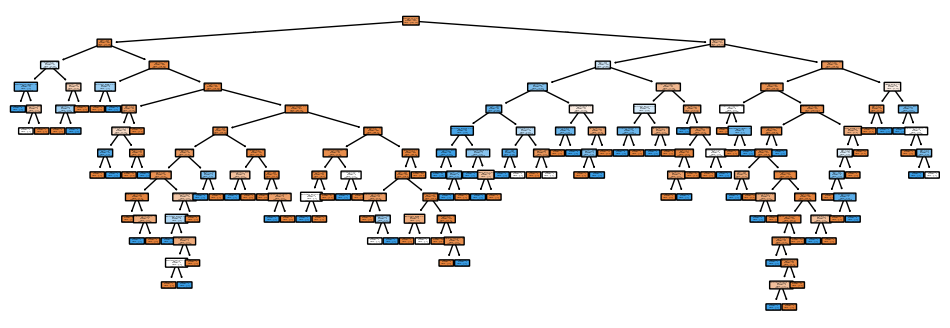

In [59]:
import matplotlib.pyplot as plt  # For plotting
from sklearn.tree import plot_tree  # For visualizing decision trees

# NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(12, 4))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No Attrition", "Yes Attrition"],
          feature_names=X_encoded.columns)
plt.show()


##### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model by comparing its predictions to the actual outcomes. It shows the counts of true positives, true negatives, false positives, and false negatives, providing insights into the model's accuracy, precision, recall, and other metrics.

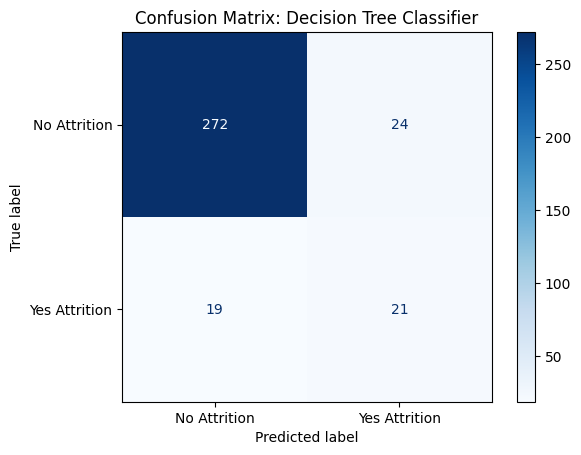

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and display the confusion matrix using the test data
ConfusionMatrixDisplay.from_estimator(
    estimator=clf_dt,             # The trained decision tree classifier
    X=X_test,                     # Test features
    y=y_test,                     # Test labels
    display_labels=["No Attrition", "Yes Attrition"],  # Custom labels
    cmap=plt.cm.Blues,            # Blue gradient for better readability
    colorbar=True                 # Adds a colorbar for interpretation
)

plt.title("Confusion Matrix: Decision Tree Classifier")
plt.show()

##### Cross Validation

In [61]:
# Set some names
FeatureNames = list(X_test.columns)
ClassNames = list(clf_dt.classes_)

In [62]:
import numpy as np  # For numerical operations (optional for extended calculations)
from sklearn.model_selection import cross_val_score  # For performing cross-validation

# Cross Validation
model = clf_dt
X = X_test
y = y_test
cv_folds = 5

# Cross-validation on the training set
cv_scores = cross_val_score(model, X, y, cv=cv_folds)

print("Cross-validation scores on training set:", cv_scores)
print("Mean CV accuracy on training set:", cv_scores.mean())
# CV accuracy = estimate of how well the model generalizes to new data.


Cross-validation scores on training set: [0.80882353 0.82089552 0.86567164 0.85074627 0.86567164]
Mean CV accuracy on training set: 0.8423617208077261


##### Importance Matrix

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Step 1: Calculate feature importances
importances = clf_dt.feature_importances_

# Create a DataFrame for feature importances
importance_plot_df = pd.DataFrame({
    'feature': FeatureNames,
    'importance': importances
})

# Filter for features with importance > 0 and sort by importance
important_features = importance_plot_df[importance_plot_df['importance'] > 0].sort_values('importance')

# Display the DataFrame
print("Features with importance > 0:")
print(important_features)



Features with importance > 0:
                     feature  importance
13  RelationshipSatisfaction    0.001025
8            JobSatisfaction    0.002808
26      Department_Maternity    0.003646
39             JobRole_Other    0.004861
12         PerformanceRating    0.006563
11         PercentSalaryHike    0.007673
41    MaritalStatus_Divorced    0.011104
43      MaritalStatus_Single    0.011546
34             Gender_Female    0.012451
25     Department_Cardiology    0.012905
42     MaritalStatus_Married    0.013450
21      YearsWithCurrManager    0.015009
16     TrainingTimesLastYear    0.021180
38             JobRole_Nurse    0.023245
17           WorkLifeBalance    0.026957
20   YearsSinceLastPromotion    0.027095
15         TotalWorkingYears    0.027467
10        NumCompaniesWorked    0.032265
4    EnvironmentSatisfaction    0.034777
14                     Shift    0.034819
1                  DailyRate    0.050437
2           DistanceFromHome    0.051759
6             JobInvolvemen

<Figure size 1000x800 with 0 Axes>

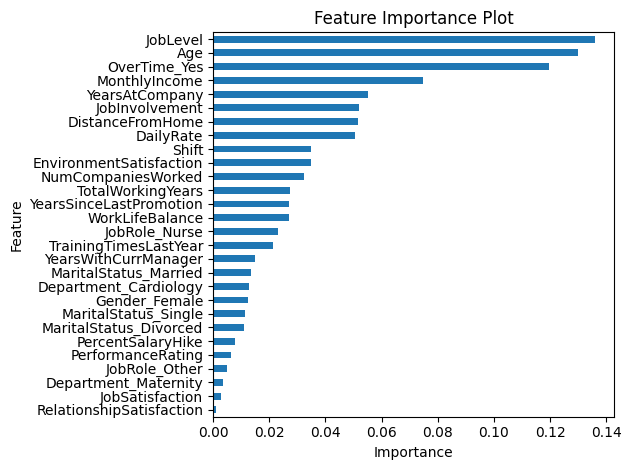

In [69]:
# Step 2: Plot feature importances
plt.figure(figsize=(10, 8))
ax = important_features.plot(kind='barh', x='feature', y='importance', legend=False)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance Plot')
plt.tight_layout()
plt.show()

Recalculated Important Features:
                     feature  importance
20                 DailyRate    0.108865
16         TotalWorkingYears    0.107977
24             MonthlyIncome    0.093566
21          DistanceFromHome    0.091135
26                       Age    0.073886
7       MaritalStatus_Single    0.073683
5          PercentSalaryHike    0.063069
13             JobRole_Nurse    0.062543
25              OverTime_Yes    0.062536
18   EnvironmentSatisfaction    0.061331
17        NumCompaniesWorked    0.045922
3              JobRole_Other    0.038382
11      YearsWithCurrManager    0.025188
22            JobInvolvement    0.019191
8              Gender_Female    0.015353
19                     Shift    0.014915
27                  JobLevel    0.014393
1            JobSatisfaction    0.009541
23            YearsAtCompany    0.009096
2       Department_Maternity    0.004798
12     TrainingTimesLastYear    0.004627
0   RelationshipSatisfaction    0.000000
15   YearsSinceLastPromo

<Figure size 1000x800 with 0 Axes>

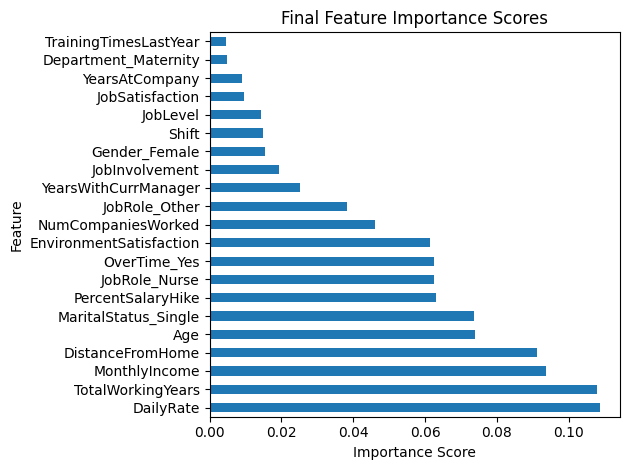


Final features used for the updated model:
                    feature  importance
20                DailyRate    0.108865
16        TotalWorkingYears    0.107977
24            MonthlyIncome    0.093566
21         DistanceFromHome    0.091135
26                      Age    0.073886
7      MaritalStatus_Single    0.073683
5         PercentSalaryHike    0.063069
13            JobRole_Nurse    0.062543
25             OverTime_Yes    0.062536
18  EnvironmentSatisfaction    0.061331
17       NumCompaniesWorked    0.045922
3             JobRole_Other    0.038382
11     YearsWithCurrManager    0.025188
22           JobInvolvement    0.019191
8             Gender_Female    0.015353
19                    Shift    0.014915
27                 JobLevel    0.014393
1           JobSatisfaction    0.009541
23           YearsAtCompany    0.009096
2      Department_Maternity    0.004798
12    TrainingTimesLastYear    0.004627


In [70]:
# Step 1: Filter the dataset to include only important features
X_filtered = X_test[important_features['feature']]

# Step 2: Refit the decision tree classifier using the filtered features
clf_dt.fit(X_filtered, y_test)

# Step 3: Recalculate feature importances and create a DataFrame
importances = clf_dt.feature_importances_
filtered_important_features = pd.DataFrame({
    'feature': X_filtered.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Display the recalculated important features
print("Recalculated Important Features:")
print(filtered_important_features)

# Step 4: Filter out features with importance ≤ 0
final_important_features = filtered_important_features[filtered_important_features['importance'] > 0]
X_final_filtered = X_test[final_important_features['feature']]

# Step 5: Refit the model with the final filtered features
clf_dt.fit(X_final_filtered, y_test)

# Step 6: Plot the recalculated feature importances
plt.figure(figsize=(10, 8))
ax = final_important_features.plot(kind='barh', x='feature', y='importance', legend=False)
ax.set_xlabel('Importance Score')
ax.set_ylabel('Feature')
ax.set_title('Final Feature Importance Scores')
plt.tight_layout()
plt.show()

# Step 7: Print final features used for the updated model
print("\nFinal features used for the updated model:")
print(final_important_features)



#### Hyper-parameter Tuning

##### Gridsearch method

In [71]:
# Initial Parameter grid tuning
param_grid = {
    'criterion': ['gini', 'entropy'],        # Use both splitting criteria
    'max_depth': [10, 20, 30],         # Allow deeper trees or unlimited depth
    'min_impurity_decrease': [0, 0.001],     # Allow very small impurity decreases
    'min_samples_split': [2, 5],             # Allow splits with smaller samples
    'min_samples_leaf': [1, 2]               # Allow smaller leaf nodes
}

cv_folds = 5

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# GridSearchCV
gridSearch = GridSearchCV(
    estimator=clf_dt,         # Model to optimize
    param_grid=param_grid,    # Parameter grid
    cv=cv_folds,                     # Number of cross-validation folds
    scoring='accuracy',       # Scoring metric (can be adjusted)
    verbose=1                 # Print progress during search
)

# Fit GridSearchCV to the training data
gridSearch.fit(X_train, y_train)

# Print best parameters and best score
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best score:  0.8940298507462685
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}


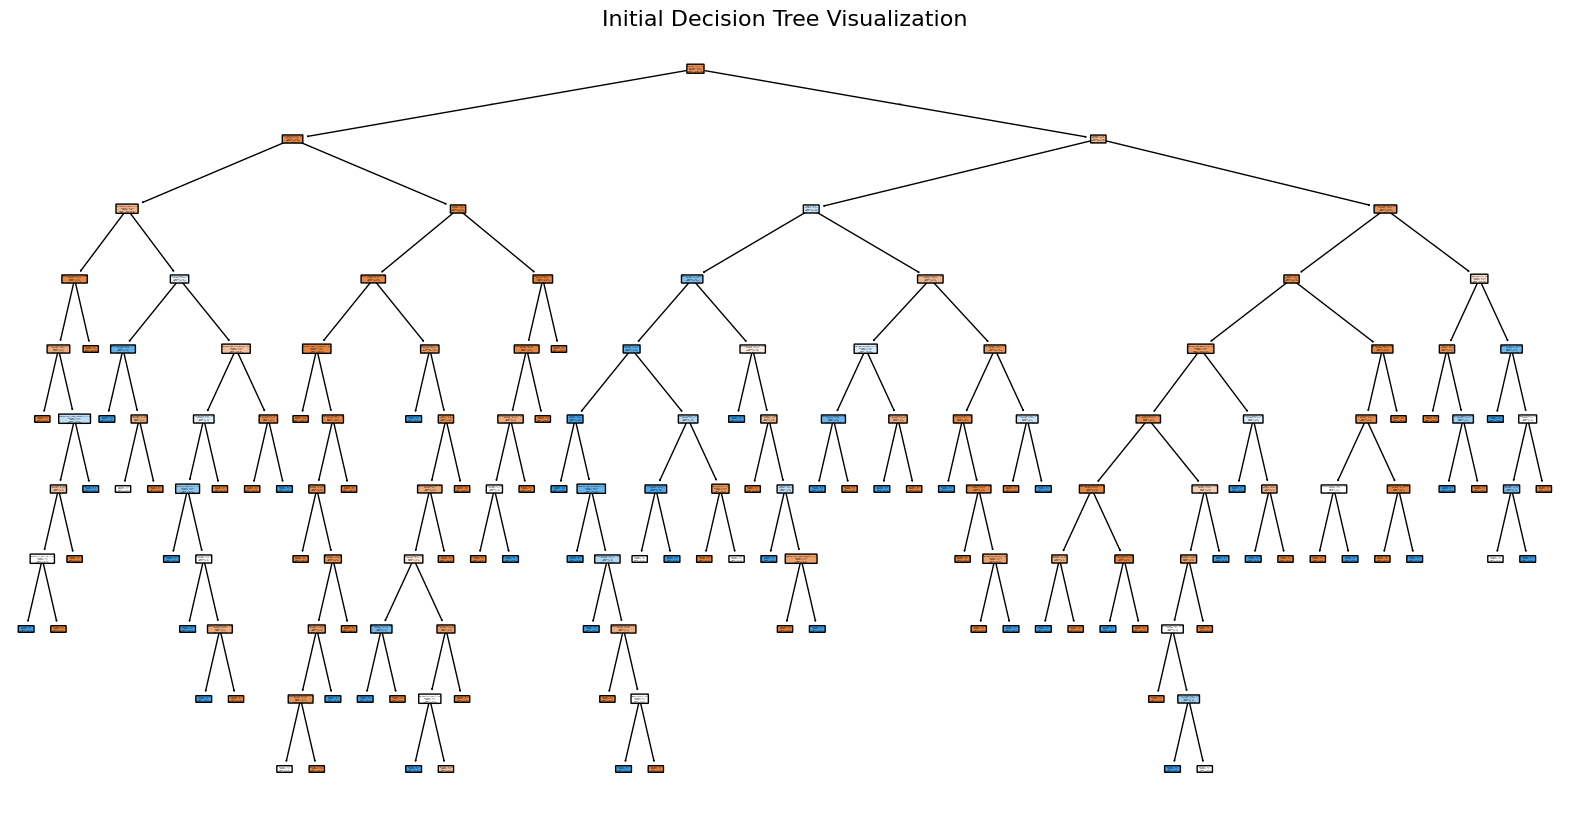

In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the best decision tree model from GridSearchCV
best_clf = gridSearch.best_estimator_

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size for better visibility
plot_tree(
    best_clf,
    feature_names=X_train.columns,  # Replace with actual feature names
    class_names=["No Attrition", "Yes Attrition"],  # Replace with actual class names
    filled=True,                     # Color the nodes based on class distribution
    rounded=True                     # Rounded corners for better readability
)

plt.title("Initial Decision Tree Visualization", fontsize=16)
plt.show()

In [80]:
# Initial Parameter grid tuning
param_grid = {
    'criterion': ['gini', 'entropy'],        # Use both splitting criteria
    'max_depth': [3],         # Allow deeper trees or unlimited depth
    'min_impurity_decrease': [0.05, 0.0001],     # Allow very small impurity decreases
    'min_samples_split': [4]#,             # Allow splits with smaller samples
    #'min_samples_leaf': [1, 2]               # Allow smaller leaf nodes
}

cv_folds = 5

In [81]:
# Updated GridsearchCV (wash, rinse, repeat)
gridSearch = GridSearchCV(clf_dt,
                           param_grid,
                           cv=cv_folds)

# fit gridsearch to training data
gridSearch.fit(X_encoded, y_encoded)

# Print best parameters and best score
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8967839374555793
Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0001, 'min_samples_split': 4}


In [82]:
# Evaluate the final model on validatoipn data
best_clf = gridSearch.best_estimator_
y_pred = best_clf.predict(X_test)
valid_accuracy = best_clf.score(X_test, y_test)

print("Accuracy on validation set:", valid_accuracy)

Accuracy on validation set: 0.9017857142857143


### Final Model

#### Final Decision Tree Plot

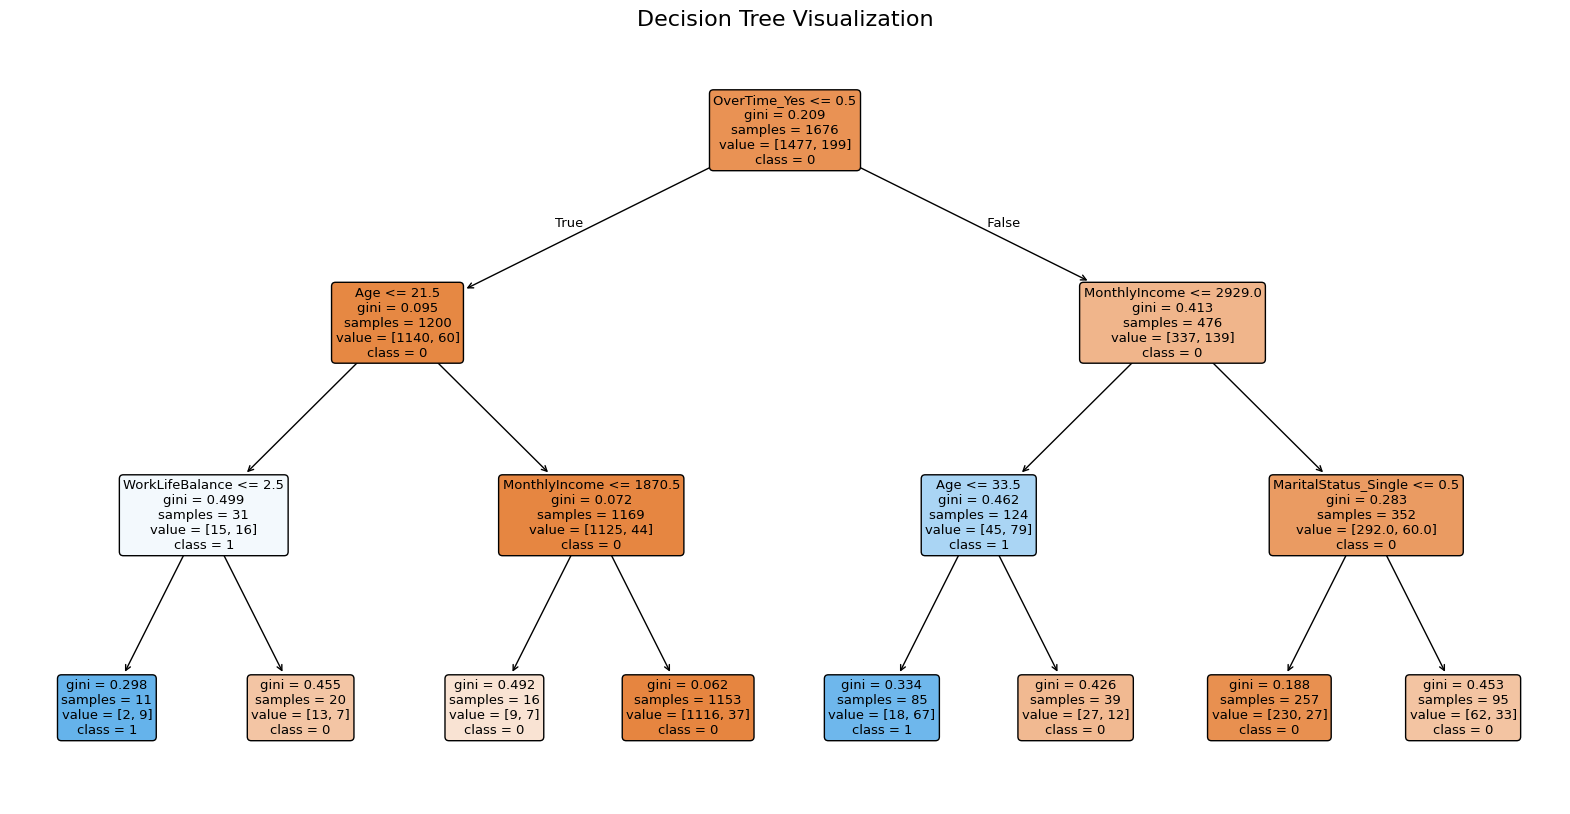

In [83]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    feature_names=X_train.columns,  # Replace with your actual feature names
    class_names=best_clf.classes_.astype(str),  # Replace with your class names if available
    filled=True,  # Color the nodes
    rounded=True  # Rounded corners for readability
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

#### Final Confusion Matrix

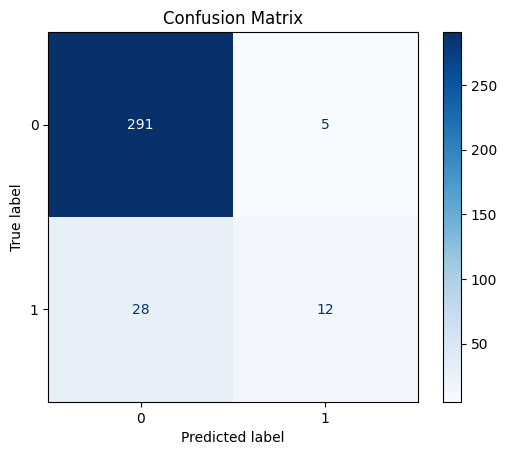

In [84]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Stage 6: Go!